## The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) 
```
#### Description ####

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

#### Usage ####

mtcars

#### Format ####

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors

#### Source ####

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

In [43]:
import numpy as np 
import scipy as sp 
import matplotlib as mpl 
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import mean_squared_error

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns #sets up styles and gives us more plotting options

In [44]:
df_cars=pd.read_csv("data/mtcars-course.csv") 
df_cars=df_cars.rename(columns={"Unnamed: 0":"name"})
df_cars.head() 

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,A,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,A,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2


In [45]:
length_dataframe = df_cars.shape[0]
range(length_dataframe)

range(0, 32)

## Train/Test Split

In [46]:
from sklearn.model_selection import train_test_split

split = train_test_split(range(length_dataframe), train_size=0.8)
i_train, i_test = split
df_cars.iloc[i_train].head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,M,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,M,3,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,A,4,2


In [47]:
x_train = df_cars.wt.values[i_train]
x_test = df_cars.wt.values[i_test]
y_train = df_cars.mpg.values[i_train]
y_test = df_cars.mpg.values[i_test]

In [48]:
X_train = x_train.reshape(x_train.shape[0], 1)
X_test = x_test.reshape(x_test.shape[0], 1)

In [49]:
from sklearn.model_selection import train_test_split

split = train_test_split(range(length_dataframe), train_size=0.8)
i_train, i_test = split
df_cars.iloc[i_train].head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,M,3,3
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,A,5,2
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,A,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,M,4,4


## k-nearest neighbors regression

In [50]:
from sklearn.neighbors import KNeighborsRegressor #导入knn函数
knn_reg = KNeighborsRegressor(n_neighbors=5) 

In [51]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [52]:
r2 = knn_reg.score(X_test, y_test)
r2

0.4636475737553136

## Which is the best k ?

{1: 0.1623774251925425, 2: 0.7412119649846388, 3: 0.5934760040963485, 4: 0.44315461786120136, 5: 0.4636475737553136, 6: 0.42139254801285075, 7: 0.38236425835853505, 8: 0.40065390766381925, 9: 0.3449132851269412, 10: 0.28160146879340187, 11: 0.19100418388212437, 12: 0.24131038431323082, 13: 0.12827045661069114, 14: 0.12255338880638735}


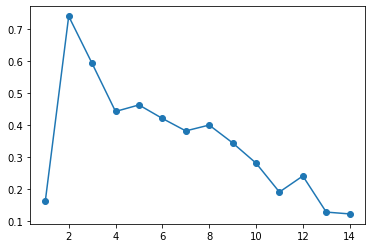

In [53]:
ks = range(1, 15)
scores = []
score_dict = {}
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    score = knnreg.score(X_test, y_test)
    scores.append(score)
    score_dict[k] = score
plt.plot(ks, scores,'o-'); #求拟合优度
print(score_dict)

## K = 7 is the best，so let's use k = 7 in the regression

In [54]:
knn_reg_2 = KNeighborsRegressor(n_neighbors=7)
knn_reg_2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [55]:
predicted_y = knn_reg_2.predict(X_test)

In [42]:
mean_squared_error(predicted_y, y_test)

10.714460641399414